In [248]:
import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [249]:
# 샘플 1개 / I am a boy 타임스텝 4 / 토큰 : 4자리 - 원핫인코딩

In [250]:
# 단어사전은 500개까지만 가져옴
# 원핫인코딩하면 500개 컬럼이 만들어짐
(train_input,train_target),(test_input,test_target) = keras.datasets.imdb.load_data(
    num_words = 500
)

In [251]:
# 1의 의미 : 토큰시작
# 2의 의미 : 단어사전에 없는 단어
print(train_input.shape,test_input.shape)

(25000,) (25000,)


In [252]:
# 이진분류 : 긍정 - 1, 부정 - 0
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [253]:
train_input,val_input,train_target,val_target = train_test_split(
    train_input,train_target,test_size=0.2,random_state=42
)

In [254]:
print(train_input.shape,val_input.shape)

(20000,) (5000,)


In [255]:
len(train_input[0])

259

In [256]:
lengths = np.array([len(x) for x in train_input])
lengths

array([259, 520, 290, ..., 300,  70,  77])

In [257]:
print(np.mean(lengths),np.median(lengths))

239.00925 178.0


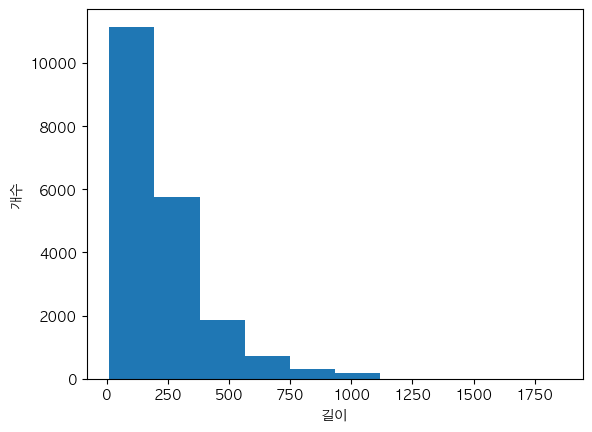

In [258]:
plt.hist(lengths)
plt.xlabel('길이')
plt.ylabel('개수')
plt.show()

In [259]:
# 시퀀스 패딩
# 글자의 수를 제한해서 없는 부분은 0으로 채워줌
# 최대 글자 수 100개 제한
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100)

In [260]:
# 2000개 샘플, 크기 100
train_seq.shape

(20000, 100)

In [261]:
# 시퀀스 패딩 적용해서 0이 없으면 글자 짤린 것임.
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [262]:
# 시퀀스 패딩은 100개 이상의 글자를 자를 때 앞부분을 자름.(뒤 내용이 더 중요판단)
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [263]:
# 6번째 샘플은 앞부분 0으로 채워져있음
# 100개 단어보다 적은 데이터 임
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [264]:
# 검증세트 - 시퀀스패딩
val_seq = pad_sequences(val_input,maxlen=100)

In [265]:
# 순환 신경망 모델 구현
model = keras.Sequential()
# 순환신경망 알고리즘
# 시퀀스패딩 - 100크기, 단어사전 - 500개
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
# 이진분류
model.add(keras.layers.Dense(1,activation='sigmoid'))

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [266]:
# fit훈련 데이터 3차원 행렬
train_oh = keras.utils.to_categorical(train_seq)

In [267]:
train_seq[0][0:20]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2], dtype=int32)

In [268]:
# 원핫인코딩 된 값 출력 - 10번째 값이 1로 변경
train_oh[0][0][:12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [269]:
# 500개 컬럼의 합은 무조건 1 - 원핫인코딩
print(np.sum(train_oh[0][0]))

1.0


In [270]:
# val_seq
val_oh = keras.utils.to_categorical(val_seq)

In [271]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_10 (SimpleRNN)       │ (None, 8)              │         4,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

In [272]:
# 인공신경망 훈련 동일
# flatten 필요없음. 원핫인코딩
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
history = model.fit(train_oh,train_target,batch_size=64,epochs=100,
                    validation_data=(val_oh,val_target), callbacks=[checkpoint_cb,early_stopping_cb])


Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5048 - loss: 0.6997 - val_accuracy: 0.5102 - val_loss: 0.6967
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5182 - loss: 0.6960 - val_accuracy: 0.5220 - val_loss: 0.6923
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5286 - loss: 0.6905 - val_accuracy: 0.5388 - val_loss: 0.6879
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5516 - loss: 0.6858 - val_accuracy: 0.5626 - val_loss: 0.6816
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5776 - loss: 0.6758 - val_accuracy: 0.6424 - val_loss: 0.6405
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6513 - loss: 0.6278 - val_accuracy: 0.6748 - val_loss: 0.6085
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6855 - loss: 0.5984 - val_accuracy: 0.7054 - val_loss: 0.5844
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7111 - loss: 0.5732 - 

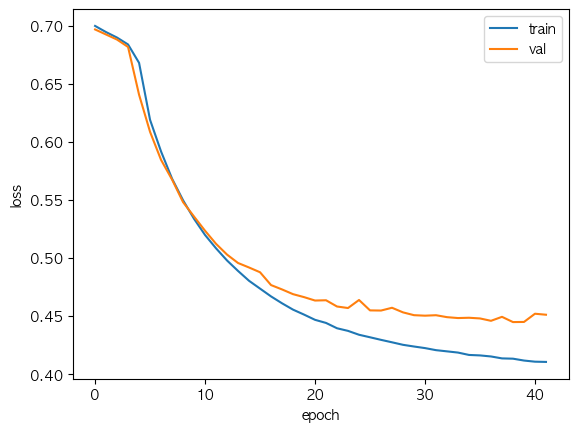

In [273]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [274]:
# stop 위치 출력 - 2번째 전 학습이 가장 좋음
early_stopping_cb.stopped_epoch

41

In [275]:
test_seq = pad_sequences(test_input, maxlen = 100)

In [276]:
test_oh = keras.utils.to_categorical(test_seq)

In [277]:
model.evaluate(test_oh,test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7954 - loss: 0.4372


[0.43830859661102295, 0.7946000099182129]

단어 임베딩

In [278]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))
model2.summary()

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [279]:
# 원핫인코딩을 사용하지 않음. - 임베딩층 사용
# train_oh -> train_seq 데이터 사용
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)

model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_embedding_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
history = model2.fit(train_seq,train_target,batch_size=64,epochs=100,
                    validation_data=(val_seq,val_target), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5092 - loss: 0.6945 - val_accuracy: 0.5852 - val_loss: 0.6819
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6145 - loss: 0.6737 - val_accuracy: 0.6646 - val_loss: 0.6542
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6835 - loss: 0.6418 - val_accuracy: 0.7038 - val_loss: 0.6243
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7149 - loss: 0.6126 - val_accuracy: 0.7262 - val_loss: 0.5995
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7381 - loss: 0.5853 - val_accuracy: 0.7354 - val_loss: 0.5793
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7545 - loss: 0.5616 - val_accuracy: 0.7268 - val_loss: 0.5688
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7653 - loss: 0.5426 - val_accuracy: 0.7570 - val_loss: 0.5428
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7775 - loss: 0.5211 - val_accu

In [281]:
model2.evaluate(val_seq,val_target)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7867 - loss: 0.4657


[0.46306952834129333, 0.7882000207901001]

In [282]:
model2.evaluate(test_seq,test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7912 - loss: 0.4558


[0.45520949363708496, 0.7907199859619141]

: 

In [ ]:
# 딥러닝 훈련
# 데이터전처리 train_scaled = train_input.reshape(-1,28,28,1)/255
# 모델결정 model = keras.Sequential()

# 합성곱 신경망 (CNN)
# 1차 합성곱 신경망
# model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'),
#                                input_shape=(28,28,1))
# 최대풀링 model.add(keras.layers.MaxPooling2D(2))
# 2차 합성곱 신경망
# model.add( keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same') )
# model.add(keras.layers.MaxPooling2D(2))
# 인공신경망 훈련
# Flatten 추가  model.add(keras.layers.Flatten())
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# 드롭아웃추가  model.add(keras.layers.Dropout(0.4)) # 40%를 제외시키는 규제적용
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 종기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True )
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                      validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)
# test세트 검증 - 3차원행렬로 변경해서 test진행해야 함.
# test_scaled = test_input.reshape(-1,28,28,1)/255.0
# model.evaluate(test_scaled,test_target)

# 순환신경망
# 전처리
# train_seq = pad_sequences(train_input, maxlen = 100)
# # 순환신경망 알고리즘
# # 시퀀스패딩 - 100크기, 단어사전 - 500개
# model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
# # 이진분류
# model.add(keras.layers.Dense(1,activation='sigmoid'))